#### Contents
    01. Notebook Set-Up
    02. Course Task 2

# Set-Up

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# File pathway

path = r'/Users/Owner/Documents/Data Analytics/4 Python/08-2022 Instacart Basket Analysis'

In [3]:
# Import data sets

df_vis = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [4]:
df_vis.shape

(32404859, 34)

In [14]:
df_vis.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spender_flag', 'median_order_freq',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'num_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [5]:
df_vis.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Task

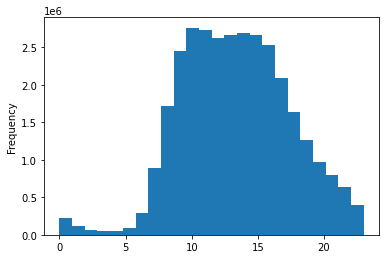

In [12]:
# 3. Create a histogram of the “order_hour_of_day” column.

hist_hour = df_vis['order_hour_of_day'].plot.hist(bins = 24)

#### This histogram shows how many orders were made at every hour of the day. We can see that most orders come in between 9 a.m. and 4 p.m.

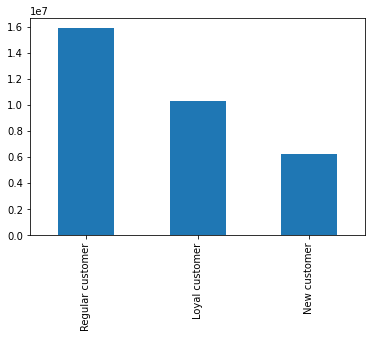

In [15]:
# 4. Create a bar chart from the “loyalty_flag” column

bar_loyal = df_vis['loyalty_flag'].value_counts().plot.bar()

In [16]:
# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

# Adding sample set

np.random.seed(4)
dev = np.random.rand(len(df_vis)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe big. 30% in the small

big = df_vis[dev]
small = df_vis[~dev]

In [18]:
df_vis_sm = small[['order_hour_of_day','prices']]

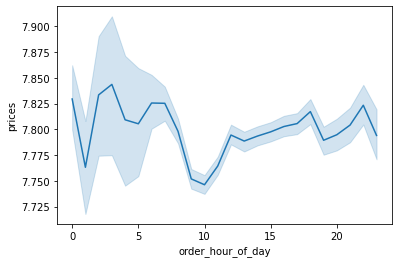

In [19]:
line_price = sns.lineplot(data = df_vis_sm, x = 'order_hour_of_day', y = 'prices')

In [20]:
# 6. Determine whether there’s a connection between age and family situation

df_vis_age = small[['age','num_of_dependants']]

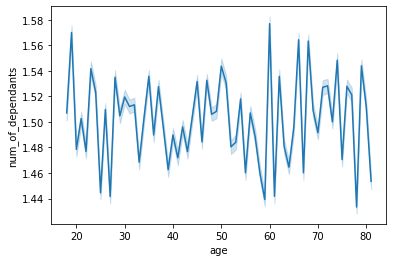

In [21]:
line_age = sns.lineplot(data = df_vis_age, x = 'age', y = 'num_of_dependants')

#### The line chart shows how age and the number of dependants are linked. We can see that these two variables have no correlation each other. People of all ages could have people who depend on them.

In [22]:
# 7. Explore whether there’s a connection between age and spending power (income)

df_vis_income = small[['age','income']]

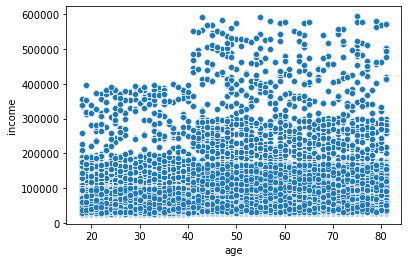

In [23]:
scat_income = sns.scatterplot(x = 'age', y = 'income', data = df_vis_income)

#### Most customers of all ages make up to 200,000 USD. In the 40+ age group, this income goes up to 300,000 USD, maxing out at 600,000 USD. 

In [25]:
# Export Images

hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hours.png'))
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))
line_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_per_hour.png'))
line_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_by_dependant.png'))
scat_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_by_income.png'))